In [1]:
import torch
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(f"{torch.__version__} and running on {device}")

2.4.0.dev20240318+cu121 and running on cuda


In [2]:
!nvidia-smi --list-gpus

GPU 0: NVIDIA GeForce RTX 3050 Laptop GPU (UUID: GPU-330ad239-4724-893d-a0f3-79234fb0788c)


### Working with Data


In [1]:
### Import libraries ###
import torch 
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor
import numpy as np
import matplotlib.pyplot as plt

In [6]:
#Download training data from open datasets
training_data = datasets.FashionMNIST(
    root='data',
    train=True,
    download=True,
    transform=ToTensor()
)

test_data = datasets.FashionMNIST(
    root='data',
    train=False,
    download=True,
    transform=ToTensor()
)

1.0%

100.0%


Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



100.0%


Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw



100.0%


Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw



100.0%


Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw



In [10]:
# Batch size can be changed
batch_size = 64

# Create data loaders
train_dataloader = DataLoader(training_data,batch_size=batch_size,shuffle=True)
test_dataloader = DataLoader(test_data,batch_size=batch_size)

for X,y in test_dataloader:
    print(f"Shape of X [N,C,H,W] : {X.shape}")
    print(f"Shape of y: {y.shape} | data type: {y.dtype}")
    break

Shape of X [N,C,H,W] : torch.Size([64, 1, 28, 28])
Shape of y: torch.Size([64]) | data type: torch.int64


### Creating Models

In [14]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(f"Using {device}")

# Define Model
class NeuralNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(28*28,512),
            nn.ReLU(),
            nn.Linear(512,512),
            nn.ReLU(),
            nn.Linear(512,10)
        )
        
    def forward(self,x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits
    

model = NeuralNetwork().to(device)
print(model)
            
    

Using cuda
NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=10, bias=True)
  )
)


### Optimizing the Model Parameters


In [16]:
# Loss function and Optimizer

loss_fn = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(),lr=1e-3)

##### Define training loop

In [17]:
def train(dataloader,model, loss_fn,optimizer):
    size = len(dataloader.dataset)
    model.train()
    for batch, (X,y) in enumerate(dataloader):
        X,y = X.to(device) , y.to(device)
        
        #Compute prediction error
        pred = model(X)
        loss = loss_fn(pred,y)
        
        #Backpropation
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()
        
        if batch % 100 == 0:
            loss, current = loss.item(), (batch + 1) * len(X)
            print(f"Loss: {loss:>7f} [{current:>5d} / {size:>5d}]")

#### Define Testing Loop

In [23]:
def test(dataloader, model, loss_fn):
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    model.eval()
    test_loss, correct = 0,0
    with torch.no_grad():
        for X,y in dataloader:
            X,y = X.to(device), y.to(device)
            pred = model(X)
            test_loss += loss_fn(pred,y).item()
            correct += (pred.argmax(1)==y).type(torch.float).sum().item()
    test_loss /= num_batches
    correct /= size
    print(f"Test Error: \nAccuracy {100 * correct}:>0.1f%, Avg Loss: {test_loss:>8f}\n")
    

In [25]:
epochs = 5
for t in range(epochs):
    print(f"Epoch {t+1}\n.......")
    train(train_dataloader,model,loss_fn,optimizer)
    test(test_dataloader,model,loss_fn)
print("Done!")

Epoch 1
.......
Loss: 0.894035 [   64 / 60000]
Loss: 0.784844 [ 6464 / 60000]


Loss: 0.951313 [12864 / 60000]
Loss: 0.896470 [19264 / 60000]
Loss: 0.859273 [25664 / 60000]
Loss: 0.861710 [32064 / 60000]
Loss: 0.808780 [38464 / 60000]
Loss: 0.822429 [44864 / 60000]
Loss: 0.744567 [51264 / 60000]
Loss: 0.928358 [57664 / 60000]
Test Error: 
Accuracy 68.16:>0.1f%, Avg Loss: 0.852636

Epoch 2
.......
Loss: 0.805443 [   64 / 60000]
Loss: 0.710286 [ 6464 / 60000]
Loss: 0.648070 [12864 / 60000]
Loss: 0.910407 [19264 / 60000]
Loss: 0.894795 [25664 / 60000]
Loss: 0.788496 [32064 / 60000]
Loss: 0.779519 [38464 / 60000]
Loss: 0.735343 [44864 / 60000]
Loss: 0.638099 [51264 / 60000]
Loss: 0.805194 [57664 / 60000]
Test Error: 
Accuracy 69.56:>0.1f%, Avg Loss: 0.813806

Epoch 3
.......
Loss: 0.590427 [   64 / 60000]
Loss: 0.756292 [ 6464 / 60000]
Loss: 0.864690 [12864 / 60000]
Loss: 0.854852 [19264 / 60000]
Loss: 0.897557 [25664 / 60000]
Loss: 0.891674 [32064 / 60000]
Loss: 0.749124 [38464 / 60000]
Loss: 0.739579 [44864 / 60000]
Loss: 0.870635 [51264 / 60000]
Loss: 0.886603 [576

### Saving the model

In [26]:
torch.save(model.state_dict(),"model.pth")
print(f"Saved Pytorch Model State to model.pth")

Saved Pytorch Model State to model.pth


In [36]:
model = NeuralNetwork().to(device)
temp = torch.load("/mnt/d/Transformers from Scratch/model.pth")
model.load_state_dict(temp)

<All keys matched successfully>

### Predictions

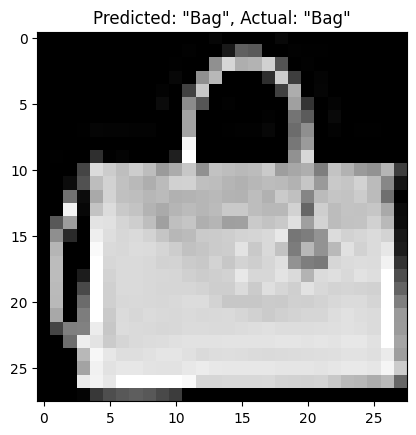

In [52]:
classes = [
    "T-shirt/top",
    "Trouser",
    "Pullover",
    "Dress",
    "Coat",
    "Sandal",
    "Shirt",
    "Sneaker",
    "Bag",
    "Ankle boot",
]

model.eval()
x,y = test_data[30][0], test_data[30][1]
with torch.no_grad():
    x = x.to(device)
    pred = model(x)
    predicted, actual = classes[pred[0].argmax(0)], classes[y]
    input_image = np.array(test_data[30][0]).reshape(28,28,1)
    plt.title(f'Predicted: "{predicted}", Actual: "{actual}"')
    plt.imshow(input_image,cmap='gray')
    plt.show()